# Topic 4 Advanced Deep Learning Models


## Topic 4.1 Convolutional Neural Networks (CNN)


### CNN on MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
x_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### Activity: CNN for Image Classification

#### Step 1: Load the Data

In [ ]:
import tensorflow as tf 
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
train_images.shape

#### Step 2: Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

#### Step 3: Train the Model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15,validation_data=(x_test, y_test))

#### Step 4: Evaluate the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### CNN on Small Dataset

#### Step 1: Import the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

##### ImageDataGenerator

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

##### Visualize the raw images 

In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images[:5])

#### Step 2: Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

#### Step 3: Train the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

#### Step 4: Evaluate the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Step 5: Test the Model

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'test_dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

preds = model.predict(img_tensor)
output = np.argmax(preds)
label = 'cat' if output == 1 else 'dog'

plt.imshow(img_tensor[0])
plt.show()
print('The model prediction is ',label)

### Dropout

#### Step 1: Load the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

#### Step 2: Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

#### Step 3: Train the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

#### Step 4: Evaluate the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Data Augumentation

#### Step 1: Load the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

##### Visualize the Data

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Step 3: Build the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

#### Step 4: Train the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

#### Step 5: Evalaute the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history_augmentation.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Activity: Dropout and Data Augmentation

#### Step 1: Import the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Step 2: Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

#### Step 3: Train the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

#### Step 4: Evalaute the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Tensorflow Hub Pre-trained Models

TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.

https://www.tensorflow.org/hub

In [3]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

%load_ext tensorboard

#### An ImageNet classifier

You'll start by using a classifier model pre-trained on the [ImageNet](https://en.wikipedia.org/wiki/ImageNet) benchmark dataset—no initial training required!

#### Download the classifier

Select a <a href="https://arxiv.org/abs/1801.04381" class="external">MobileNetV2</a> pre-trained model [from TensorFlow Hub](https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2) and wrap it as a Keras layer with [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer). Any <a href="https://tfhub.dev/s?q=tf2&module-type=image-classification/" class="external">compatible image classifier model</a> from TensorFlow Hub will work here, including the examples provided in the drop-down below.

In [4]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2 

In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

#### Run it on a single image

Download a single image to try the model o

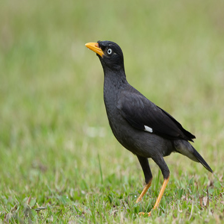

In [20]:
img = '/content/test5.jpg'
img = Image.open(img).resize(IMAGE_SHAPE)
img

In [21]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

Add a batch dimension (with `np.newaxis`) and pass the image to the model:

In [22]:
result = classifier.predict(img[np.newaxis, ...])
result.shape

(1, 1001)

The result is a 1001-element vector of logits, rating the probability of each class for the image.

The top class ID can be found with `tf.math.argmax`:

In [23]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=81>

In [24]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

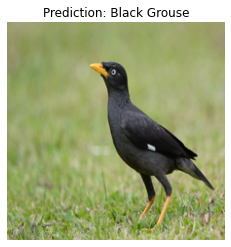

In [25]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

#### Activity: Tensorflow Hub Pre-trained Models

In [34]:
resnet50_v1 ="_____________________________"

classifier_model = resnet50_v1

In [35]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    ___________________________________)
])

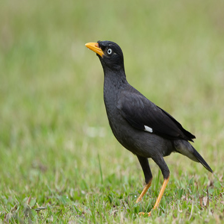

In [36]:
img = '___________________'
img = Image.open(img).resize(IMAGE_SHAPE)
img

In [37]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [38]:
result = _______________________________
result.shape

(1, 1001)

In [39]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=18>

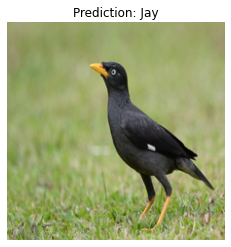

In [40]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

#### Solution: Tensorflow Hub Pre-trained Models

In [ ]:
mobilenet_v2 ="https://tfhub.dev/tensorflow/resnet_50/classification/1"

classifier_model = mobilenet_v2 

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
img = '/content/test5.jpg'
img = Image.open(img).resize(IMAGE_SHAPE)
img

In [ ]:
img = np.array(img)/255.0
img.shape

In [ ]:
result = classifier.predict(img[np.newaxis, ...])
result.shape

In [ ]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

In [ ]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

### Transfer Learning

In [41]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('/content/test5.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


[[0.9948591  0.00514092]]


### Activity: Transfer Learning

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('______________________')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


## Topic 4.2 Time Series Forecasting with Recurrent Neural Network (RNN)


### RNN/LSTM/GRU and Input Parameters

In [ ]:
import tensorflow as tf 
import numpy as np

batch = 5 
feature = 10 # could be the embedding size
hidden_size = 20 
timesteps = 3 # sequence length 

inputs = np.random.randn(batch, timesteps, feature)
rnn = tf.keras.layers.SimpleRNN(hidden_size)

h_out = rnn(inputs)
print('Output size (batch, hidden_size) = ', h_out.shape)

In [ ]:
import tensorflow as tf 

batch = 5 
feature = 10 # could be the embedding size
hidden_size = 20 
timesteps = 3 # sequence length 

inputs = np.random.randn(batch, timesteps, feature)
lstm = tf.keras.layers.LSTM(hidden_size)

h_out = lstm(inputs)
print('Output size (batch, hidden_size) = ', h_out.shape)

In [ ]:
import tensorflow as tf 

batch = 5 
feature = 10 # could be the embedding size
hidden_size = 20 
timesteps = 3 # sequence length 

inputs = np.random.randn(batch, timesteps, feature)
gru = tf.keras.layers.GRU(hidden_size)

h_out = gru(inputs)
print('Output size (batch, hidden_size) = ', h_out.shape)

### Time Series Forcasting with RNN

#### Stock Price Prediction

##### Step 1: Preprocess the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [ ]:
# stock_dataset = pd.read_csv('https://raw.githubusercontent.com/tertiarycourses/datasets/master/DBS.csv',usecols=['Date','Close'])

start_date = '2021-06-01'
end_date = '2021-11-30'
ticker = 'D05.SI'
stock_dataset = yf.download(ticker,start=start_date, end=end_date)

stock_dataset.head(10)

In [ ]:
stock_dataset.describe()

In [ ]:
#dataset = stock_dataset.iloc[:,1:2].values

dataset = stock_dataset['Close'].values
dataset = dataset[..., tf.newaxis]

plt.plot(dataset)
plt.xlabel('Day')
plt.ylabel('Stock Market Price')
plt.show()

In [ ]:
def sliding_window(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

In [ ]:
train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

In [ ]:
X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

In [ ]:
feature = 1
hidden_size = 5
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))


##### Step 2: Define the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

##### Step 3: Loss Function and Optimizer

In [ ]:
ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=ADAM)

##### Step 4: Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=1000)

##### Step 5: Evaluate the Model

In [ ]:
loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

In [ ]:
yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Impact of Learning Rate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

ADAM = tf.keras.optimizers.Adam(learning_rate=0.2)
model.compile(loss='mse', optimizer=ADAM)

history = model.fit(X_train, y_train, epochs=1000)

loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Impact of Sequence Length

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

feature = 1
hidden_size = 5
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=ADAM)

history = model.fit(X_train, y_train, epochs=1000)

loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Impact of Hidden Size

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

feature = 1
hidden_size = 2
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=ADAM)

history = model.fit(X_train, y_train, epochs=1000)

loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Activity: Stock Market Forecasting

##### Step 1: Preprocess the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#stock_dataset = pd.read_csv('https://raw.githubusercontent.com/tertiarycourses/datasets/master/AAPL.csv',usecols=['Date','Close'])

start_date = '2021-06-01'
end_date = '2021-11-30'
ticker = 'AAPL'
stock_dataset = yf.download(ticker,start=start_date, end=end_date)

stock_dataset.head(10)


In [ ]:
stock_dataset.describe()

In [ ]:
# dataset = stock_dataset.iloc[:,1:2].values

dataset = stock_dataset['Close'].values
dataset = dataset[..., tf.newaxis]

plt.plot(dataset)
plt.xlabel('Day')
plt.ylabel('Stock Market Price')
plt.show()

In [ ]:
def sliding_window(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

In [ ]:
train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

In [ ]:
X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

In [ ]:
feature = 1
hidden_size = 5
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))


##### Step 2 Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

##### Step 3: Loss Function and Optimizer

In [ ]:
model.compile(loss='mse', optimizer='adam')

##### Step 4: Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=1000)

##### Step 5: Evaluate teh Model

In [ ]:
loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

In [ ]:
yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()